In [1]:
from abipy.lumi.deltaSCF import DeltaSCF
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import phonopy
from abipy.abilab import abiopen
from abipy.dfpt.converters import ddb_ucell_to_phonopy_supercell
from abipy.embedding.embedding_ifc import Embedded_phonons
from pymatgen.io.phonopy import get_pmg_structure
from abipy.core.kpoints import kmesh_from_mpdivs
from abipy.lumi.lineshape import Lineshape

In [ ]:
ddb_pristine=abiopen("lumi/flow_phonons/w0/outdata/out_DDB")

ph_defect=phonopy.load(supercell_filename="lumi/flow_phonons_doped/w0/outdata/POSCAR",
                       force_sets_filename="lumi/flow_phonons_doped/w0/outdata/FORCE_SETS")

In [23]:
files=["lumi/flow_deltaSCF/w0/t2/outdata/out_GSR.nc",
        "lumi/flow_deltaSCF/w0/t3/outdata/out_GSR.nc",
        "lumi/flow_deltaSCF/w0/t4/outdata/out_GSR.nc",
        "lumi/flow_deltaSCF/w0/t5/outdata/out_GSR.nc",]
results=DeltaSCF.from_four_points_file(files) 

## size sc deltaSCF = size sc phonons bulk (use of forces or displacements)


In [24]:
#get_pmg_structure(ph_defect.supercell)

Structure Summary
Lattice
    abc : 7.95900000000185 7.95900000000185 6.367999999991055
 angles : 90.0 90.0 90.0
 volume : 403.38529660762083
      A : 7.95900000000185 0.0 0.0
      B : 0.0 7.95900000000185 0.0
      C : 0.0 0.0 6.367999999991055
    pbc : True True True
PeriodicSite: Eu (3.9795, 0.0000, 1.5920) [0.5000, 0.0000, 0.2500]
PeriodicSite: Sr (3.9795, 0.0000, 4.7760) [0.5000, 0.0000, 0.7500]
PeriodicSite: Sr (7.9590, 3.9795, 0.0008) [1.0000, 0.5000, 0.0001]
PeriodicSite: Sr (7.9590, 3.9795, 3.1832) [1.0000, 0.5000, 0.4999]
PeriodicSite: Li (1.0143, 6.5691, 1.5920) [0.1274, 0.8254, 0.2500]
PeriodicSite: Li (1.0112, 6.5664, 4.7760) [0.1270, 0.8250, 0.7500]
PeriodicSite: Li (6.9447, 1.3899, 1.5920) [0.8726, 0.1746, 0.2500]
PeriodicSite: Li (6.9478, 1.3926, 4.7760) [0.8730, 0.1750, 0.7500]
PeriodicSite: Li (1.3928, 1.0131, 0.0018) [0.1750, 0.1273, 0.0003]
PeriodicSite: Li (1.3928, 1.0131, 3.1822) [0.1750, 0.1273, 0.4997]
PeriodicSite: Li (6.5662, 6.9459, 0.0018) [0.8250, 0.8727

In [26]:
lineshape=Lineshape.from_phonopy_phonons(E_zpl=results.E_zpl(),
                                         phonopy_ph=ph_defect,
                                         dSCF_structure=results.structure_gs(),
                                         use_forces=False,
                                         dSCF_displacements=results.diff_pos(),
                                         dSCF_forces=results.forces_gs,
                                         coords_defect_dSCF=np.array([3.9795, 0.0000, 1.5920]),
                                         coords_defect_phonons=np.array([3.9795, 0.0000, 1.5920]))

Mapping between delta SCF supercell and phonon supercell succeeded.  36 / 36


In [34]:
results.S_em()

1.9473471528141943

In [22]:
lineshape.S_tot()

1.8857349034116855

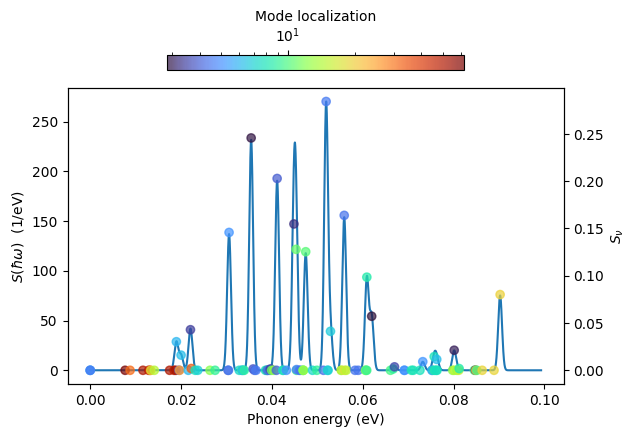

In [53]:
lineshape.plot_spectral_function(with_local_ratio=True);

  color: :mpltype:`color`


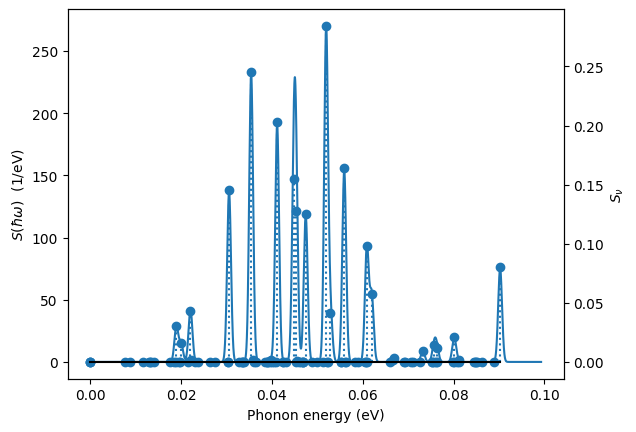

In [67]:
lineshape.plot_spectral_function(with_S_nu=True);


In [62]:
print(np.round(results.S_em(),3))

1.947


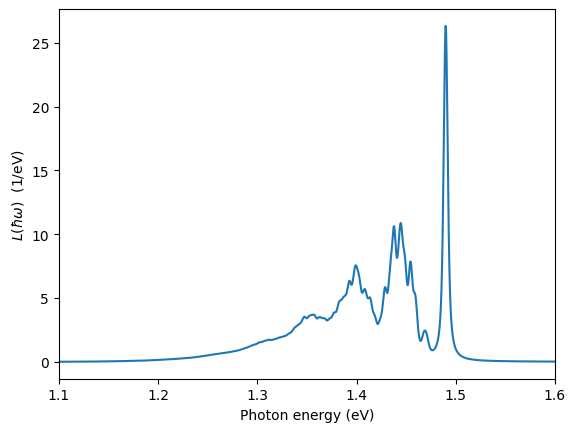

In [65]:
fig, ax = plt.subplots()
lineshape.plot_emission_spectrum(ax=ax,show=False,lamb=10)
ax.set_xlim(1.1,1.6);

In [ ]:
##size sc deltaSCF = size sc phonons with defect (use of forces or displacements)


In [ ]:
##size sc deltaSCF < size sc phonons bulk (use of forces, no embedding)


In [ ]:
##size sc deltaSCF < size sc phonons defect (use of forces, embedding)


In [2]:
ddb_pristine=abiopen("lumi/flow_phonons/w0/outdata/out_DDB")
sc_size=[2,2,4]

qpts=kmesh_from_mpdivs(mpdivs=sc_size,shifts=[0,0,0],order="unit_cell")
ddb_pristine_inter=ddb_pristine.anaget_interpolated_ddb(qpt_list=qpts)


In [3]:
ph_pristine=ddb_ucell_to_phonopy_supercell(ddb_pristine_inter)


In [4]:
ph_defect=phonopy.load(supercell_filename="lumi/flow_phonons_doped/w0/outdata/POSCAR",
                       force_sets_filename="lumi/flow_phonons_doped/w0/outdata/FORCE_SETS")


In [5]:
# We need first to create the defect structure without relax
structure_defect_wo_relax=ddb_pristine.structure.copy()
structure_defect_wo_relax.make_supercell([1,1,2])
structure_defect_wo_relax.replace(0,'Eu')
#structure_defect_wo_relax.sort()

# index of the sub. = 0 (in defect structure), this is found manually
idefect_defect_stru=0
main_defect_coords_in_defect=structure_defect_wo_relax.cart_coords[idefect_defect_stru]

# index of the sub. = 0 (in pristine structure), this is found manually
from pymatgen.io.phonopy import get_pmg_structure
idefect_pristine_stru=0
main_defect_coords_in_pristine=get_pmg_structure(ph_pristine.supercell).cart_coords[idefect_pristine_stru]


In [6]:
emb_ph=Embedded_phonons.from_phonopy_instances(phonopy_pristine=ph_pristine,
                                               phonopy_defect=ph_defect,
                                               structure_defect_wo_relax=structure_defect_wo_relax,
                                               main_defect_coords_in_defect=main_defect_coords_in_defect,
                                               main_defect_coords_in_pristine=main_defect_coords_in_pristine,
                                               substitutions_list=[[idefect_pristine_stru,"Eu"]],
                                               cut_off_mode="auto",rc_2=3,rc_1=1000,verbose=False
                                       ) 

Number of atoms in the pristine supercell      : 288
Number of atoms in the defective supercell     : 36
Defect infos
    Substitutions:
       0, [3.9795 0.     1.592 ], Sr1 replaced by Eu
Mapping after structure manipulation           : 36/36

 Set IFC to explicit defect phonons calculations if both atoms are separated from defect by a distance < R_c2 = 3.152

 Enforce ASR

 Embedding procedure done


In [7]:
files=["lumi/flow_deltaSCF/w0/t2/outdata/out_GSR.nc",
        "lumi/flow_deltaSCF/w0/t3/outdata/out_GSR.nc",
        "lumi/flow_deltaSCF/w0/t4/outdata/out_GSR.nc",
        "lumi/flow_deltaSCF/w0/t5/outdata/out_GSR.nc",]
results=DeltaSCF.from_four_points_file(files) 

In [8]:
from abipy.lumi.lineshape import Lineshape

In [68]:
lineshape=Lineshape.from_phonopy_phonons(E_zpl=results.E_zpl(),
                                         phonopy_ph=emb_ph,
                                         dSCF_structure=results.structure_gs(),
                                         use_forces=True,
                                         dSCF_displacements=results.diff_pos(),
                                         dSCF_forces=results.forces_gs,
                                         coords_defect_dSCF=np.array([3.9795, 0.0000, 1.5920]),
                                         coords_defect_phonons=np.array([0,0,0]))

Mapping between delta SCF supercell and phonon supercell succeeded.  36 / 36


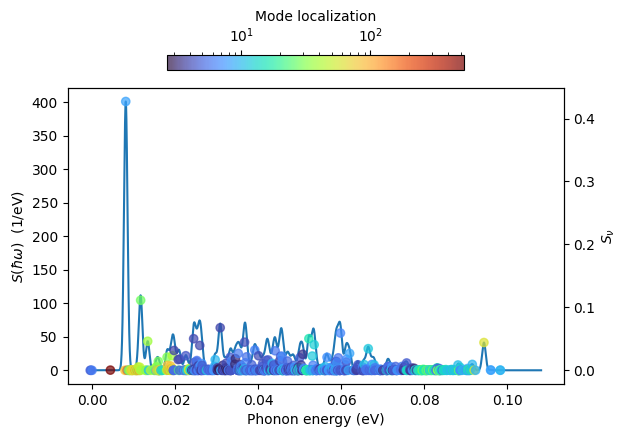

In [70]:
lineshape.plot_spectral_function(with_local_ratio=True);

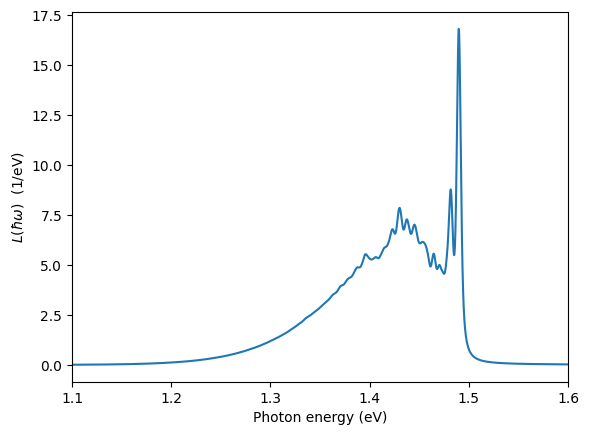

In [72]:
fig, ax = plt.subplots()
lineshape.plot_emission_spectrum(ax=ax,show=False,lamb=10)
ax.set_xlim(1.1,1.6);

In [73]:
lineshape.S_tot()

2.3576448271512884

In [ ]:
lineshape.ph_eigvec

In [10]:
from abipy.embedding.utils_ifc import localization_ratio
vecs=lineshape.ph_eigvec
#freqs,vecs=emb_ph.get_gamma_freq_with_vec_abipy_fmt()
local_ratio=localization_ratio(vecs)

In [15]:
from abipy.tools.plotting import get_ax_fig_plt
def plot_spectral_function(broadening=1,ax=None,with_S_nu=False,with_local_ratio=True,**kwargs):
    """     
    Plot the Huang-Rhys spectral function S_hbarOmega

    Args:
        broadening: fwhm of the gaussian broadening in meV
        with_S_nu: True to add stem lines associated to the individuals partial Huang-Rhys factors
    """     
    ax, fig, plt = get_ax_fig_plt(ax=ax)
    S_nu=lineshape.S_nu()
    omega_nu=lineshape.ph_eigfreq
    S_x,S_y=lineshape.S_hbarOmega(broadening=broadening)

    if with_local_ratio==True:
        ax2=ax.twinx()
        scat=ax2.scatter(omega_nu,S_nu,c=local_ratio,norm="log",cmap="turbo",alpha=0.7)
        fig.colorbar(scat,location="top",shrink=0.6,label="Mode localization")
        ax2.set_ylabel(r'$S_{\nu}$')
        

    if with_S_nu==True:
        ax2=ax.twinx()
        markerline, stemlines, baseline = ax2.stem(omega_nu,S_nu,markerfmt='o',basefmt="k")
        plt.setp(markerline,'color')
        plt.setp(stemlines, 'color', plt.getp(markerline, 'color'))
        plt.setp(stemlines, 'linestyle', 'dotted')
        ax2.set_ylabel(r'$S_{\nu}$')

    ax.plot(S_x,S_y,**kwargs)
    ax.set_xlabel('Phonon energy (eV)')
    ax.set_ylabel(r'$S(\hbar\omega)$  (1/eV)')

    return fig

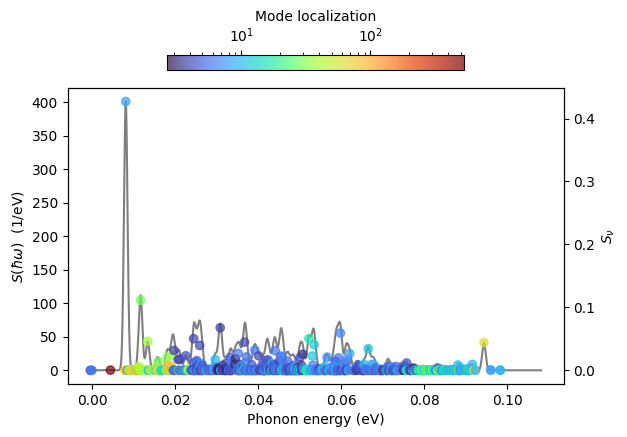

In [20]:
plot_spectral_function(color="k",alpha=0.5);

Text(0, 0.5, '$S(\\hbar\\omega)$  (1/eV)')

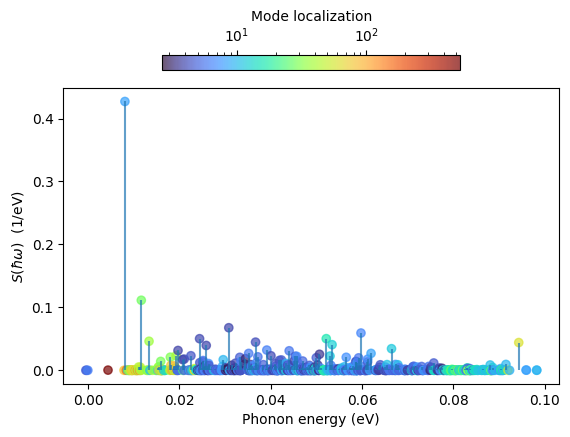

In [13]:

fig, ax = plt.subplots()

S_nu=lineshape.S_nu()
omega_nu=lineshape.ph_eigfreq
S_x,S_y=lineshape.S_hbarOmega(broadening=2)


#ax2=ax.twinx()

scat=ax.scatter(omega_nu,S_nu,c=local_ratio,norm="log",cmap="turbo",alpha=0.7)
ax.vlines(x=omega_nu,ymin=np.array([0]*len(S_nu)),ymax=S_nu,colors=scat.get_facecolor())

fig.colorbar(scat,location="top",shrink=0.6,label="Mode localization")
ax.set_ylabel(r'$S_{\nu}$')


#ax.plot(S_x,S_y);
ax.set_xlabel('Phonon energy (eV)')
ax.set_ylabel(r'$S(\hbar\omega)$  (1/eV)')


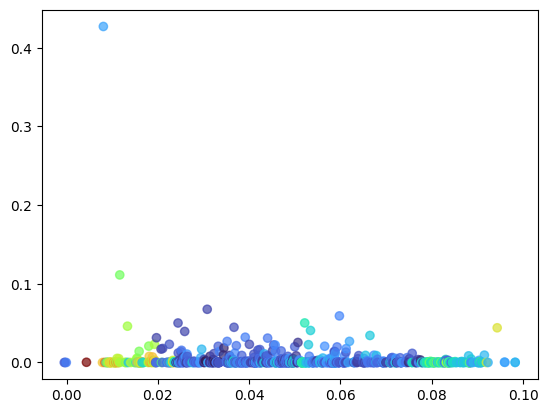

In [80]:
plt.scatter(omega_nu,S_nu,c=scat.get_facecolor(),)

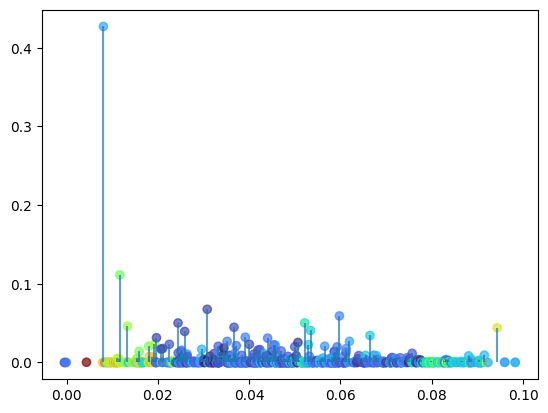

In [106]:
#sca=ax.scatter(omega_nu,S_nu,c=local_ratio,norm="log",cmap="turbo",alpha=0.7,)

fig, ax = plt.subplots()

scat=ax.scatter(omega_nu,S_nu,c=local_ratio,norm="log",cmap="turbo",alpha=0.7,)

#ax.scatter(omega_nu,S_nu,c=scat.get_facecolor(),)
ax.vlines(x=omega_nu,ymin=np.array([0]*len(S_nu)),ymax=S_nu,colors=sca.get_facecolor())
fig.colorbar(sca,location="top",shrink=0.6,label="Mode localization")


In [77]:
scat.get_edgecolor()

array([[0.27429, 0.39043, 0.85393, 0.7    ],
       [0.27334, 0.38008, 0.84037, 0.7    ],
       [0.27603, 0.49132, 0.95857, 0.7    ],
       ...,
       [0.22676, 0.63913, 0.98851, 0.7    ],
       [0.17223, 0.7168 , 0.93981, 0.7    ],
       [0.17923, 0.70732, 0.94761, 0.7    ]])

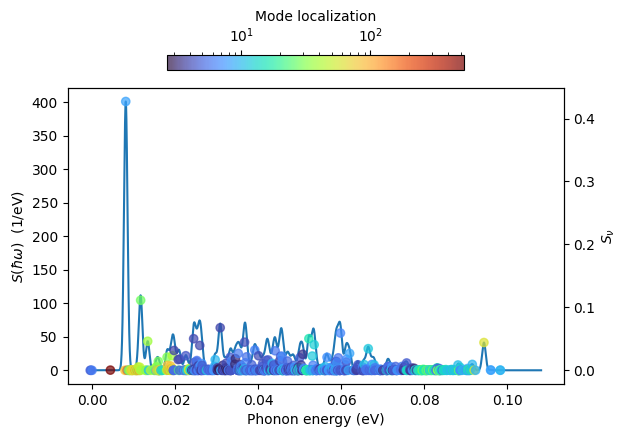

In [43]:
plot_spectral_function(with_local_ratio=True);

NameError: name 'with_local_ratio' is not defined

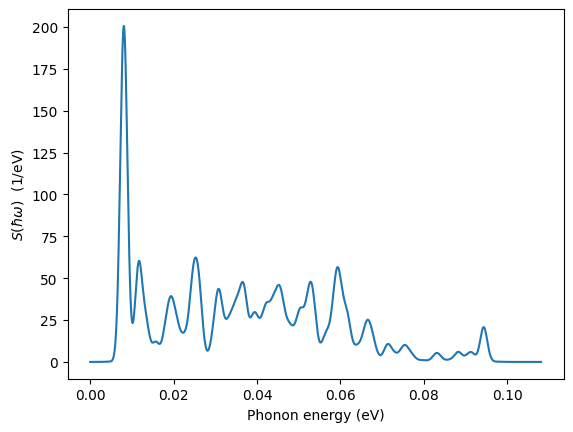

In [20]:
fig,ax=plt.subplots()
lineshape.plot_spectral_function(ax=ax,broadening=2);
    #    plot_spectral_function(color="k");

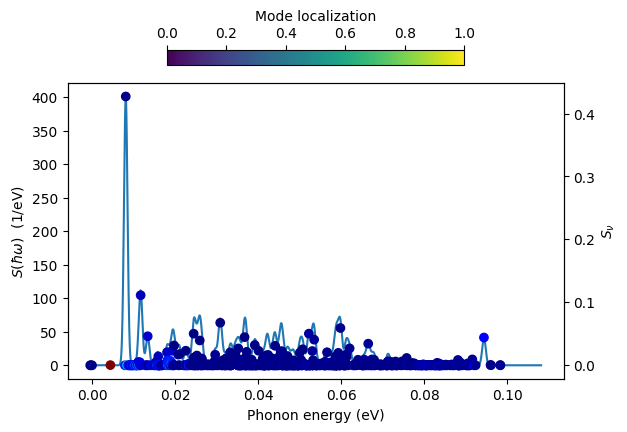